# Student Performance Analysis - Data science, ML 

In [1]:
# for some basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for providing path
import os
print(os.listdir('./'))

['.ipynb_checkpoints', 'AIMLLab-VISem-2020', 'StudentsPerformance_DA.csv', 'WS-StudentPerfAnalysis.ipynb']


**Reading the Data set**

In [67]:
# reading the data
data = pd.read_csv('./StudentsPerformance_DA.csv')

# getting the shape of the data
print(data.shape)

(1000, 8)


In [68]:
# looking at the head of the data

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group A,some high school,standard,completed,92,100,97
1,female,group A,associate's degree,standard,none,82,93,93
2,female,group A,some high school,standard,completed,85,90,92
3,female,group A,some college,standard,completed,78,87,91
4,female,group A,high school,free/reduced,completed,77,88,85


## Descriptive Statistics

In [69]:
# describing the dataset

data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [71]:
# lets check the no. of unique items present in the categorical column

print(data.select_dtypes('object').nunique())
#np.unique(data.select_dtypes('object').values)
#print(np.unique(data['parental level of education']))

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64


In [72]:
# lets check the percentage of missing data in each columns present in the data

no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


# Data Visulaizations(Exploratory Data Analysis)

In [73]:
for style in plt.style.available:
    print(style)

Solarize_Light2
_classic_test_patch
_mpl-gallery
_mpl-gallery-nogrid
bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
seaborn
seaborn-bright
seaborn-colorblind
seaborn-dark
seaborn-dark-palette
seaborn-darkgrid
seaborn-deep
seaborn-muted
seaborn-notebook
seaborn-paper
seaborn-pastel
seaborn-poster
seaborn-talk
seaborn-ticks
seaborn-white
seaborn-whitegrid
tableau-colorblind10


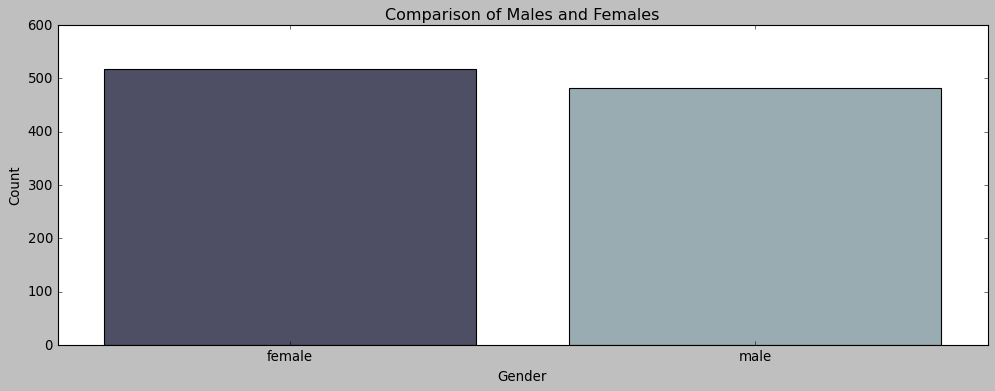

In [74]:
# visualising the number of male and female in the dataset

plt.rcParams['figure.figsize'] = (15, 5)
#plt.style.use('_classic_test')
sns.countplot(data['gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

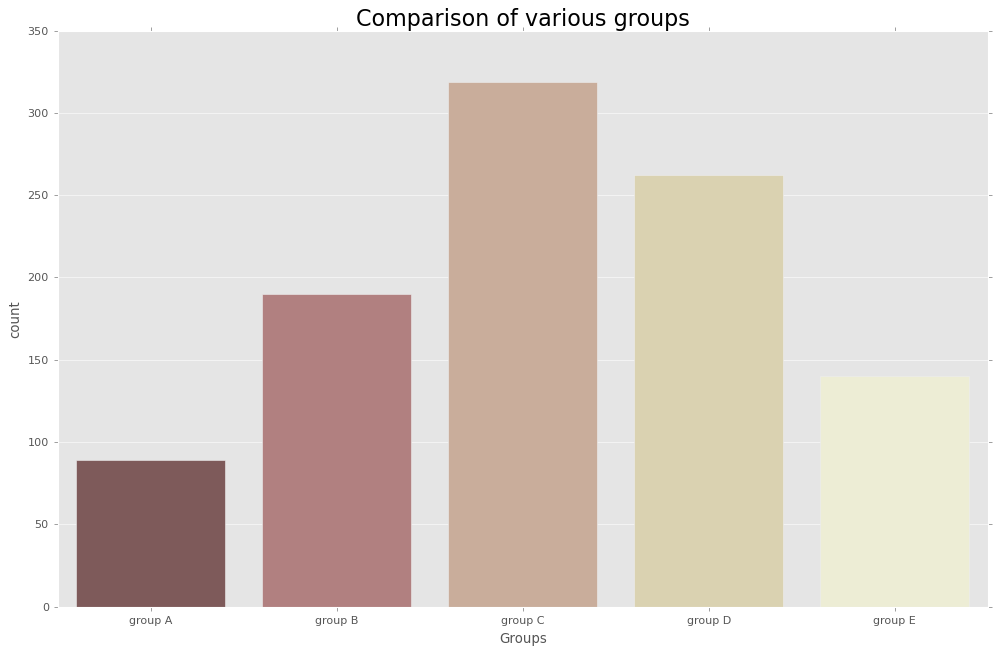

In [75]:
# visualizing the different groups in the dataset

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

sns.countplot(data['race/ethnicity'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

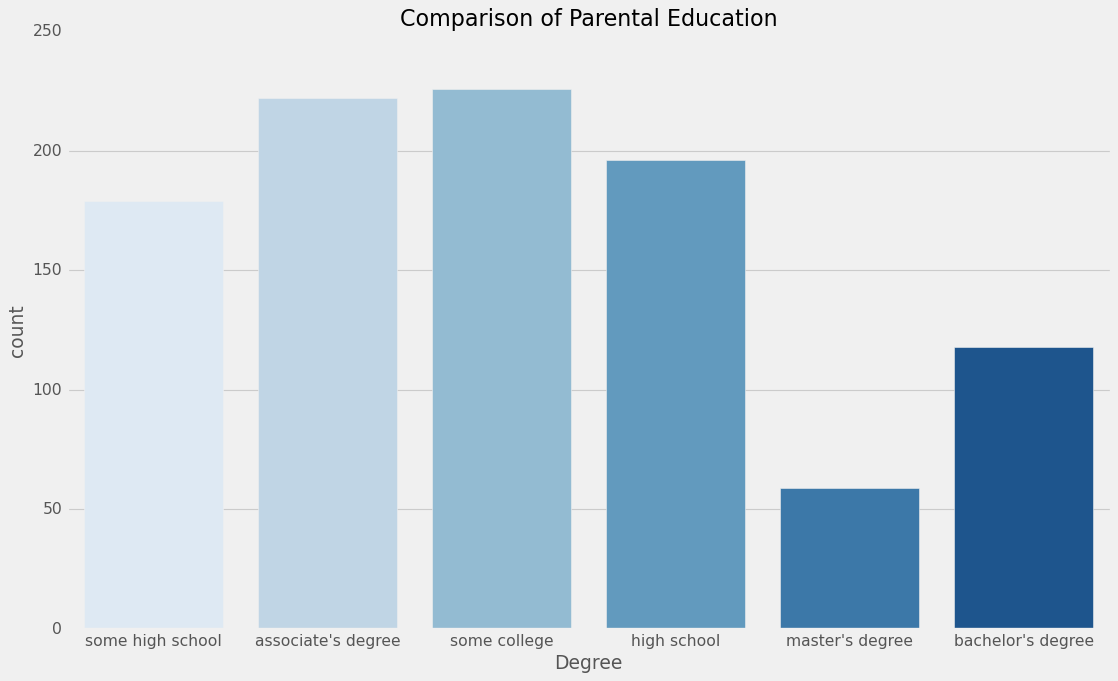

In [76]:
# visualizing the differnt parental education levels

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

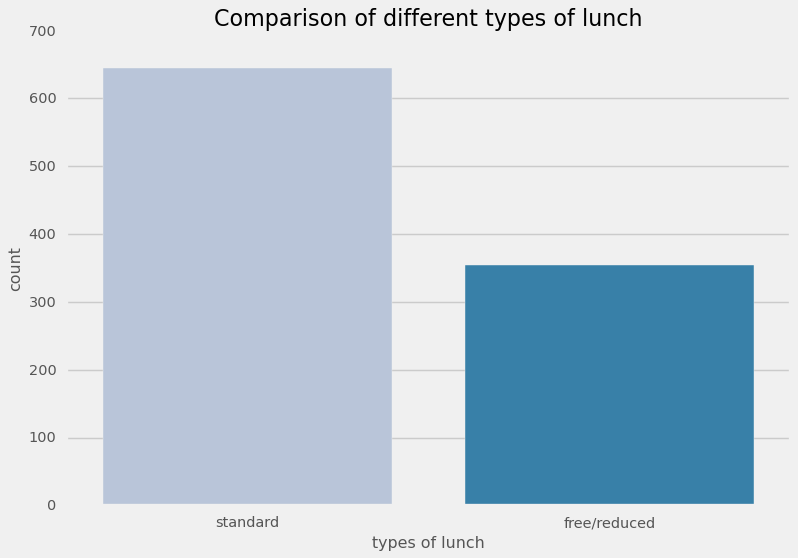

In [77]:
# visualizing different types of lunch 

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')

sns.countplot(data['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

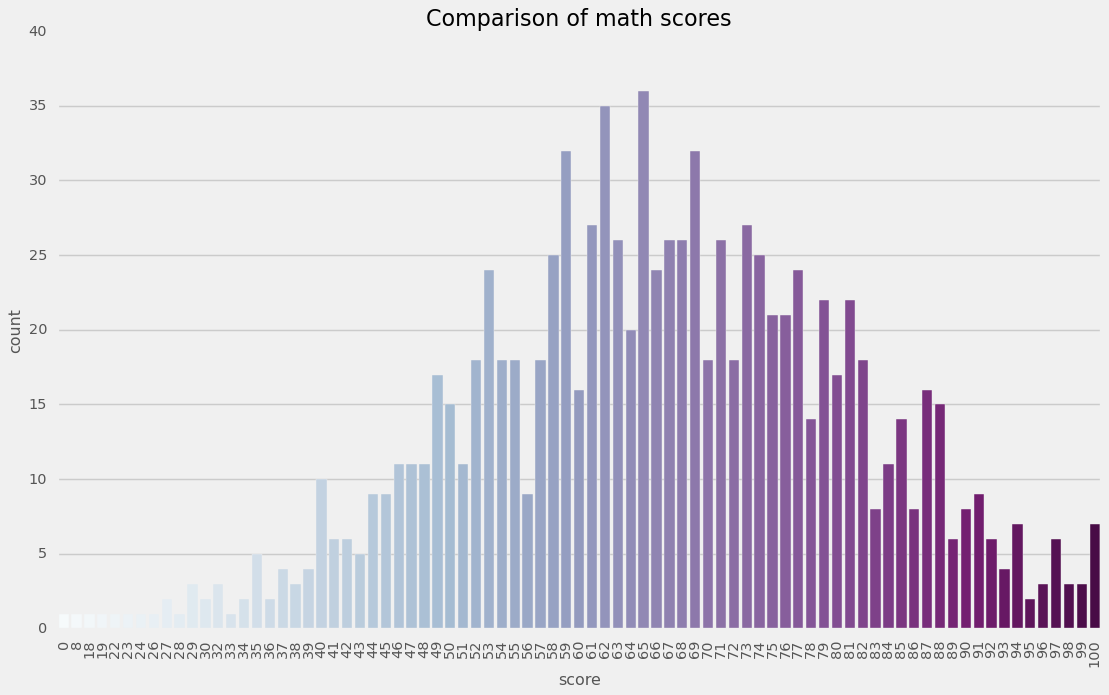

In [78]:
# visualizing maths score

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['math score'], palette = 'BuPu')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

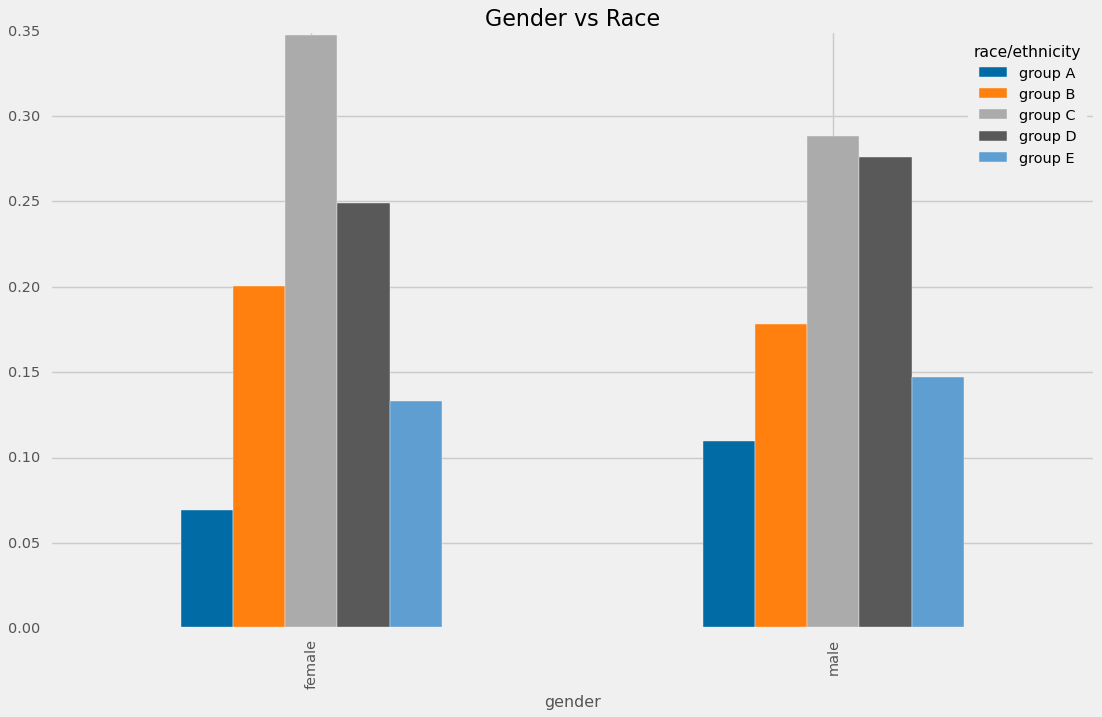

In [79]:
# gender vs race/etnicity 

plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(data['gender'], data['race/ethnicity'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Gender vs Race', fontweight = 30, fontsize = 20)
plt.show()

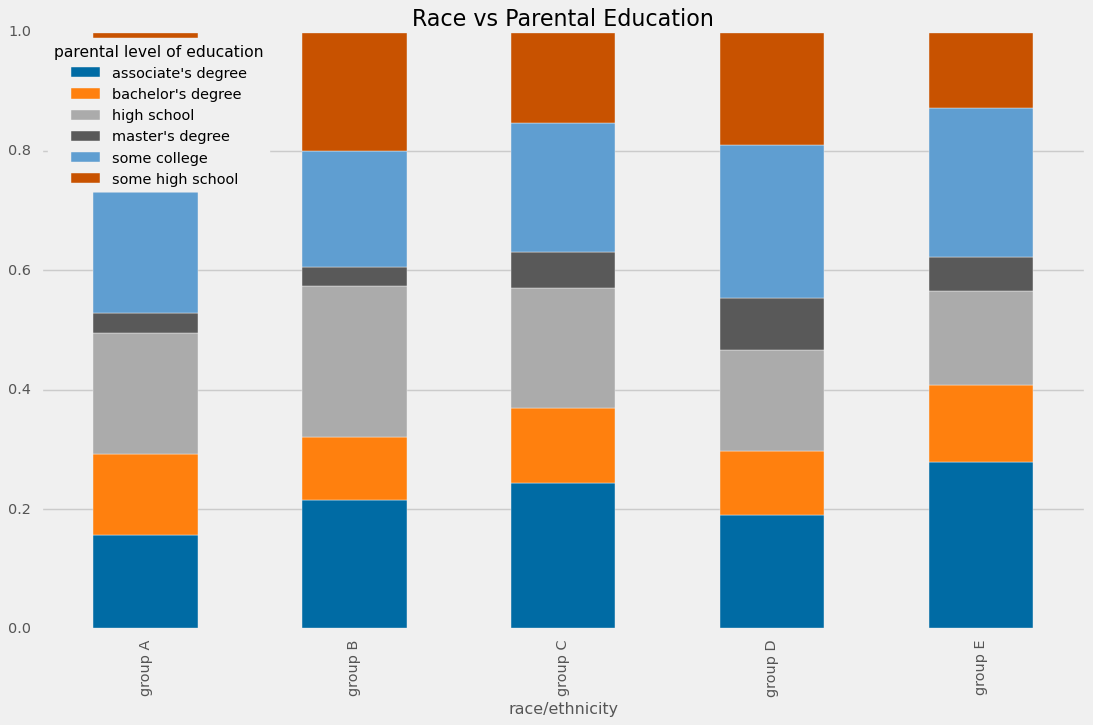

In [80]:
# comparison of race/ethnicity and parental level of education

plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(data['race/ethnicity'], data['parental level of education'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True')
plt.title('Race vs Parental Education', fontweight = 30, fontsize = 20)
plt.show()

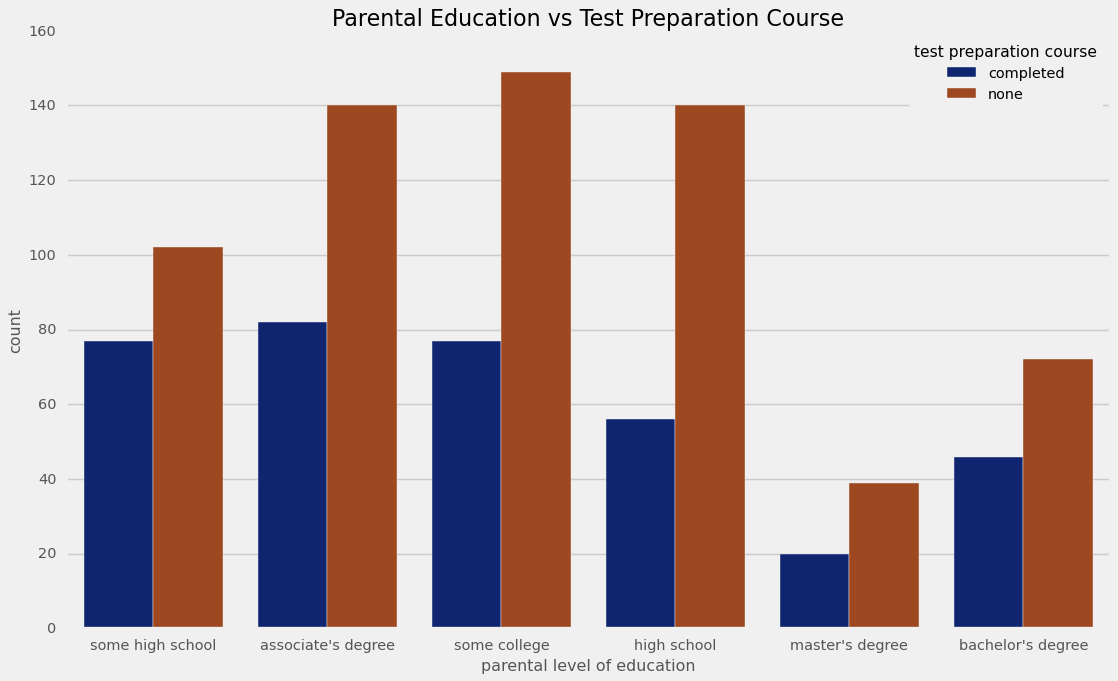

In [81]:
# comparison of parental degree and test course

plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(x = 'parental level of education', data = data, hue = 'test preparation course', palette = 'dark')
plt.title('Parental Education vs Test Preparation Course', fontweight = 30, fontsize = 20)
plt.show()

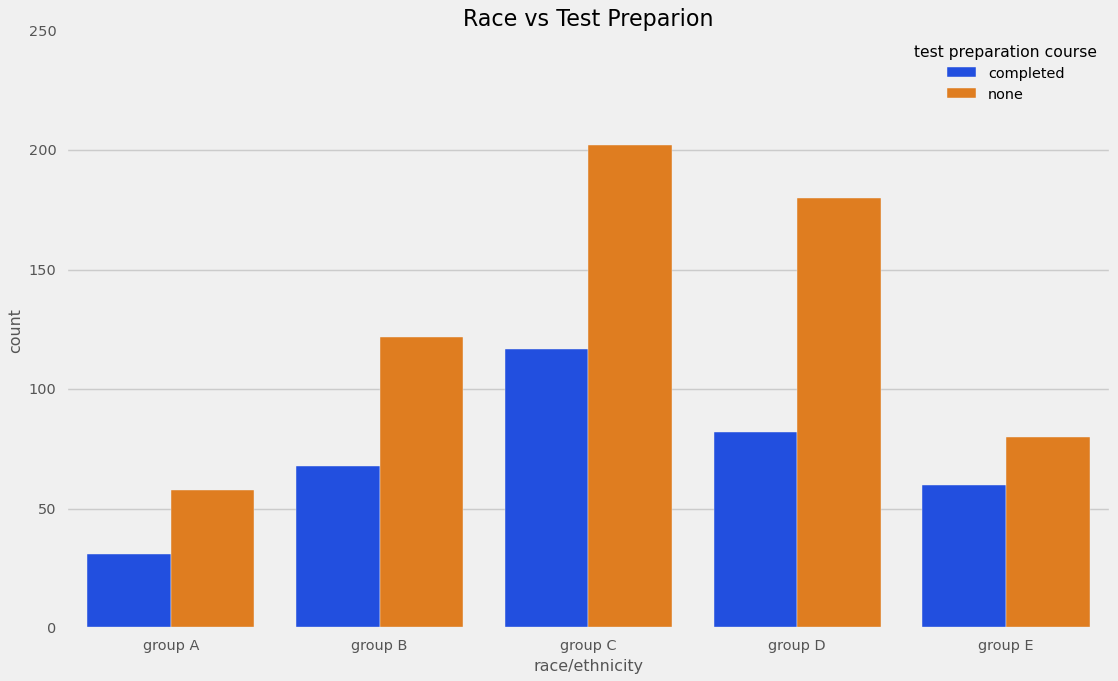

In [82]:
# comparison of race/ethnicity and test preparation course

sns.countplot(x = 'race/ethnicity', data = data,  hue = 'test preparation course', palette = 'bright')
plt.title('Race vs Test Preparion', fontweight = 30, fontsize = 20)
plt.show()

In [83]:
!pip install dabl
import dabl

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=2.01E+03'}, xlabel='reading score', ylabel='math score'>,
         <AxesSubplot:title={'center':'F=1.81E+03'}, xlabel='writing score'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=7.31E-02'}, xlabel='math score', ylabel='gender'>,
         <AxesSubplot:title={'center':'F=1.49E-02'}, xlabel='math score', ylabel='race/ethnicity'>,
         <AxesSubplot:title={'center':'F=4.92E-03'}, xlabel='math score', ylabel='parental level of...'>,
         <AxesSubplot:title={'center':'F=2.65E-03'}, xlabel='math score', ylabel='lunch'>,
         <AxesSubplot:title={'center':'F=0.00E+00'}, xlabel='math score', ylabel='test preparation ...'>]],
       dtype=object)]

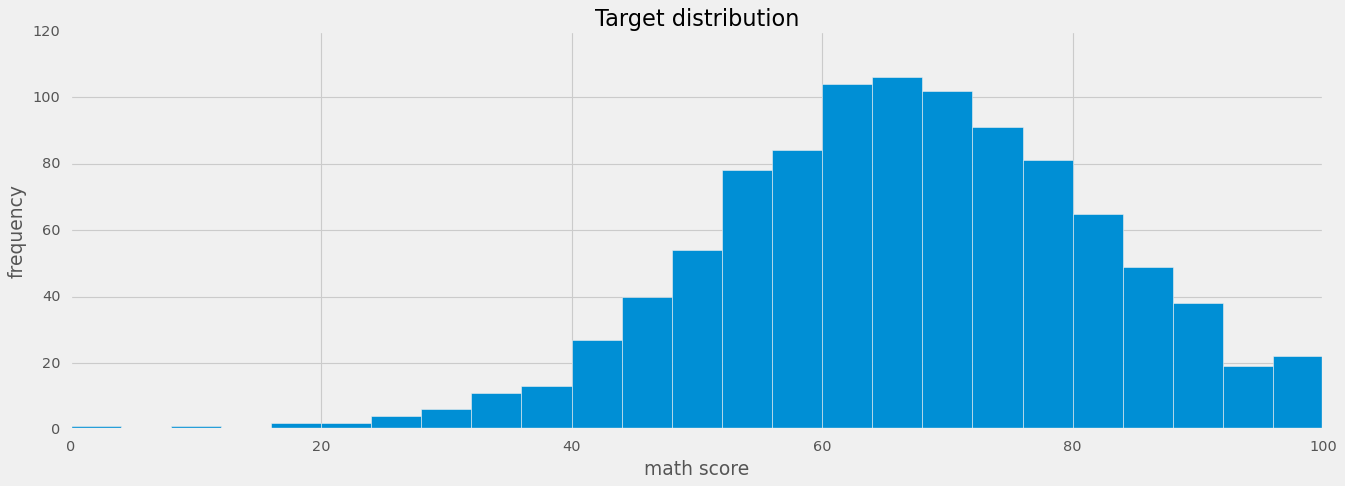

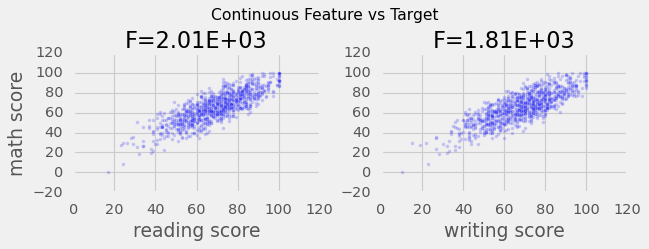

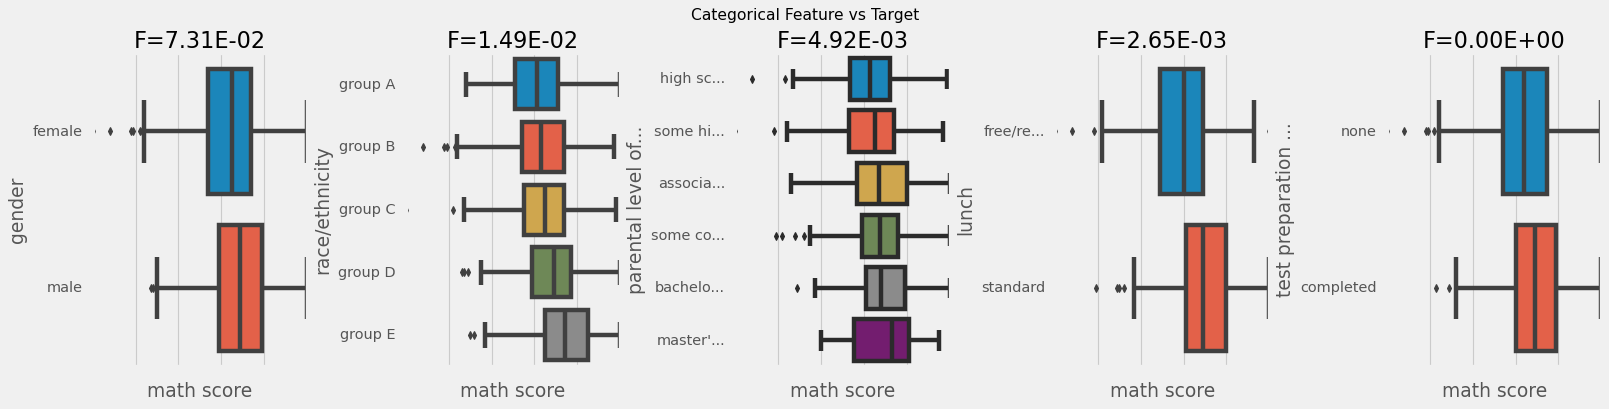

In [84]:
# comparison of all other attributes with respect to Math Marks

plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'math score')

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=1.02E+04'}, xlabel='writing score', ylabel='reading score'>,
         <AxesSubplot:title={'center':'F=2.01E+03'}, xlabel='math score'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=3.48E-02'}, xlabel='reading score', ylabel='gender'>,
         <AxesSubplot:title={'center':'F=2.90E-02'}, xlabel='reading score', ylabel='race/ethnicity'>,
         <AxesSubplot:title={'center':'F=2.82E-02'}, xlabel='reading score', ylabel='parental level of...'>,
         <AxesSubplot:title={'center':'F=1.80E-02'}, xlabel='reading score', ylabel='lunch'>,
         <AxesSubplot:title={'center':'F=1.72E-02'}, xlabel='reading score', ylabel='test preparation ...'>]],
       dtype=object)]

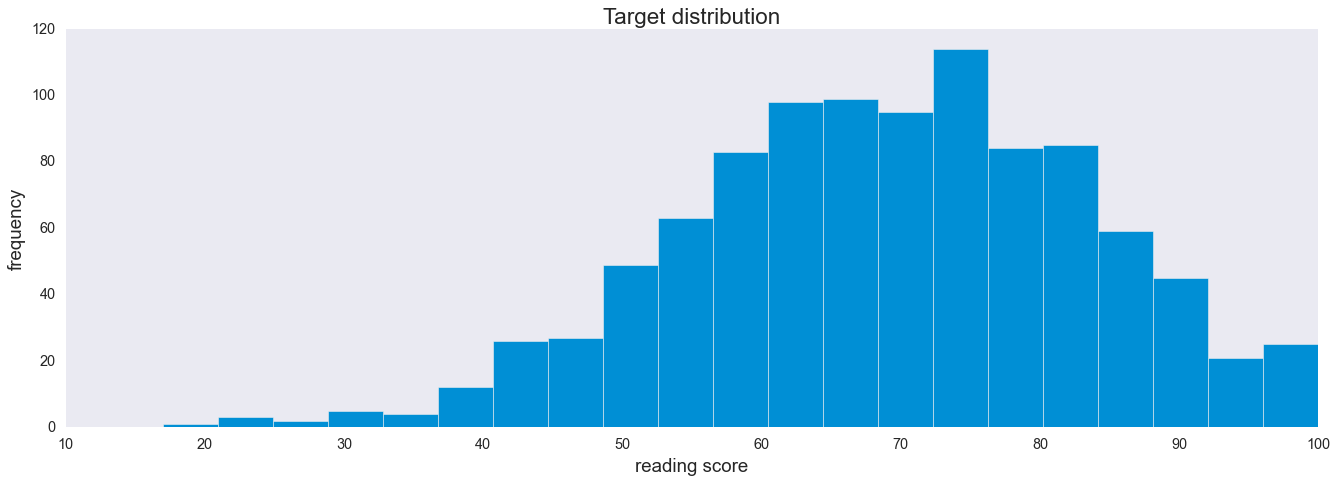

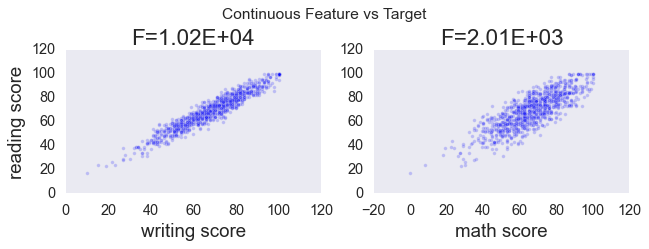

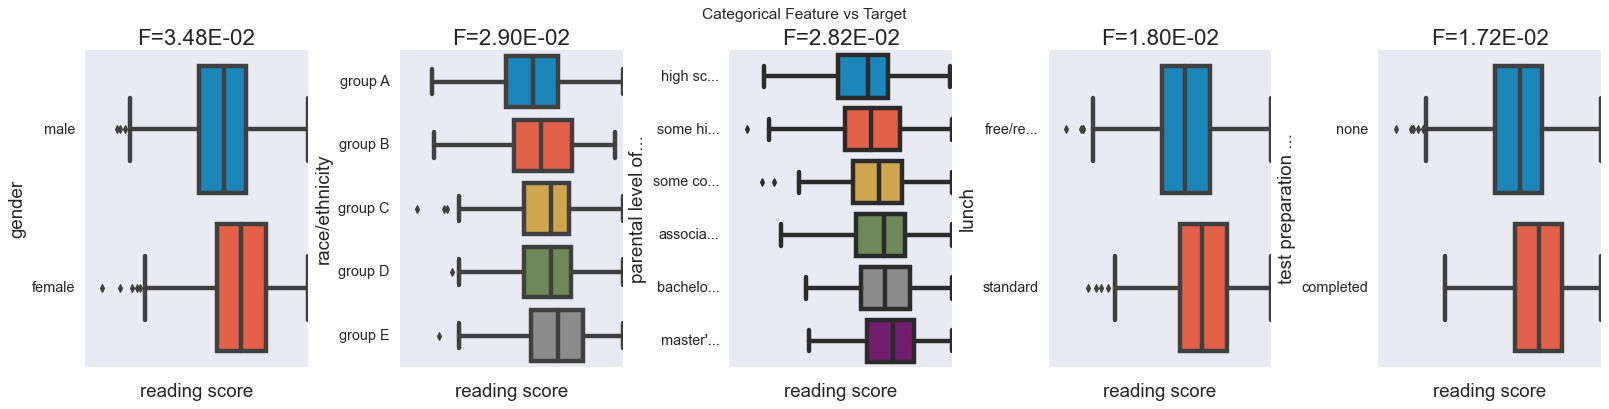

In [85]:
# comparison of all other attributes with respect to Reading Marks

plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('seaborn-dark')
dabl.plot(data, target_col = 'reading score')

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=1.02E+04'}, xlabel='reading score', ylabel='writing score'>,
         <AxesSubplot:title={'center':'F=1.81E+03'}, xlabel='math score'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=6.16E-02'}, xlabel='writing score', ylabel='gender'>,
         <AxesSubplot:title={'center':'F=4.49E-02'}, xlabel='writing score', ylabel='race/ethnicity'>,
         <AxesSubplot:title={'center':'F=4.40E-02'}, xlabel='writing score', ylabel='parental level of...'>,
         <AxesSubplot:title={'center':'F=4.26E-02'}, xlabel='writing score', ylabel='lunch'>,
         <AxesSubplot:title={'center':'F=1.90E-02'}, xlabel='writing score', ylabel='test preparation ...'>]],
       dtype=object)]

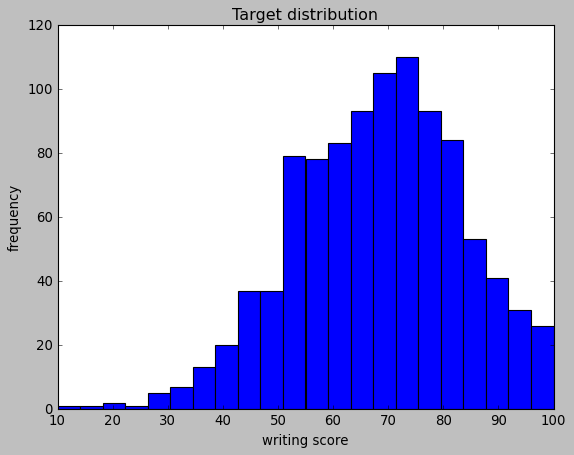

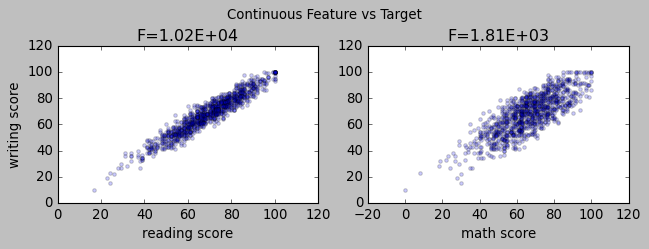

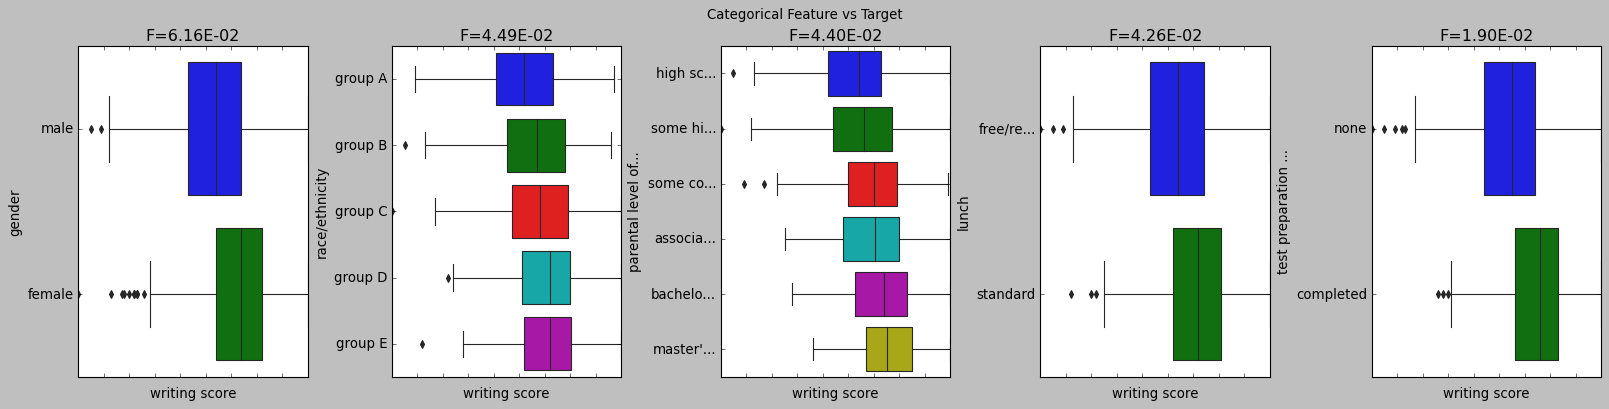

In [86]:
# comparison of all other attributes with respect to Writing Marks

plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('classic')
dabl.plot(data, target_col = 'writing score')

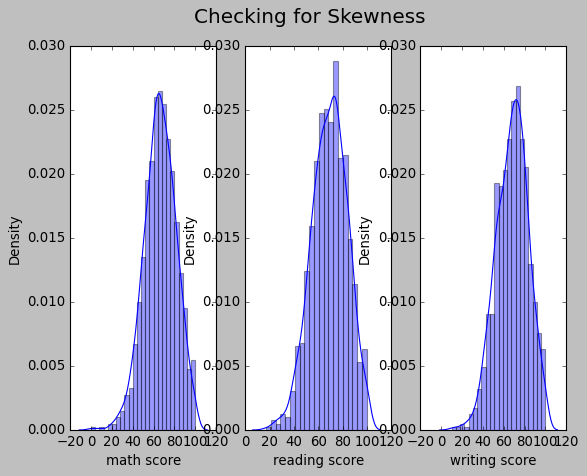

In [87]:
# Distribution plots
plt.subplot(1, 3, 1)
sns.distplot(data['math score'])

plt.subplot(1, 3, 2)
sns.distplot(data['reading score'])

plt.subplot(1, 3, 3)
sns.distplot(data['writing score'])

plt.suptitle('Checking for Skewness', fontsize = 18)
plt.show()

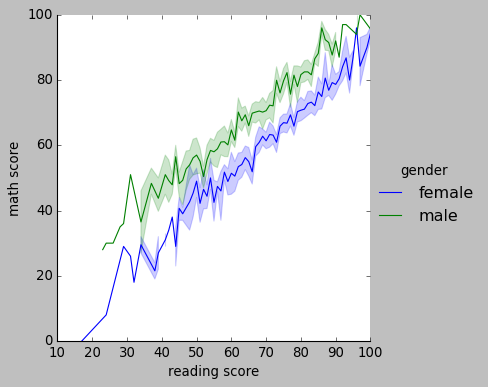

In [88]:
#Relational - scatter, lines etc..
sns.relplot(x="reading score", y="math score", hue="gender",
            dashes=False, markers=True, kind="line", data=data);

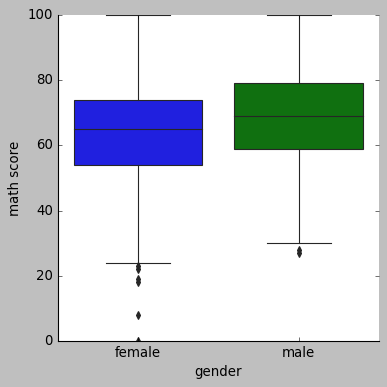

In [89]:
#Categorical plots
sns.catplot(y="math score", x="gender", kind="box", data=data)

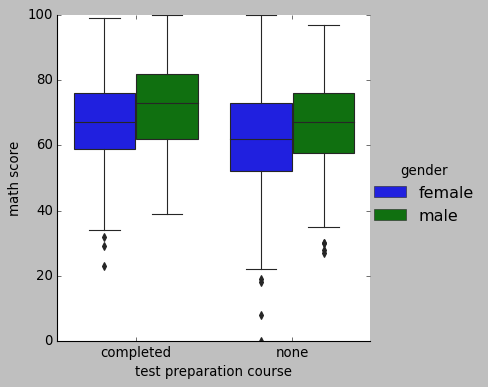

In [90]:
sns.catplot(x="test preparation course", y="math score", hue='gender', kind="box", data=data)

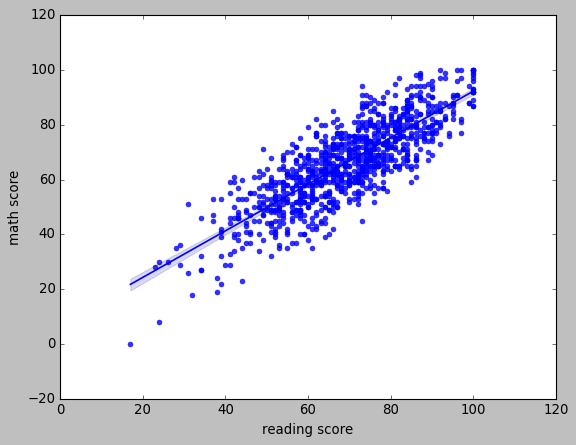

In [91]:
#Regression plots
sns.regplot(x="reading score", y="math score", data=data);

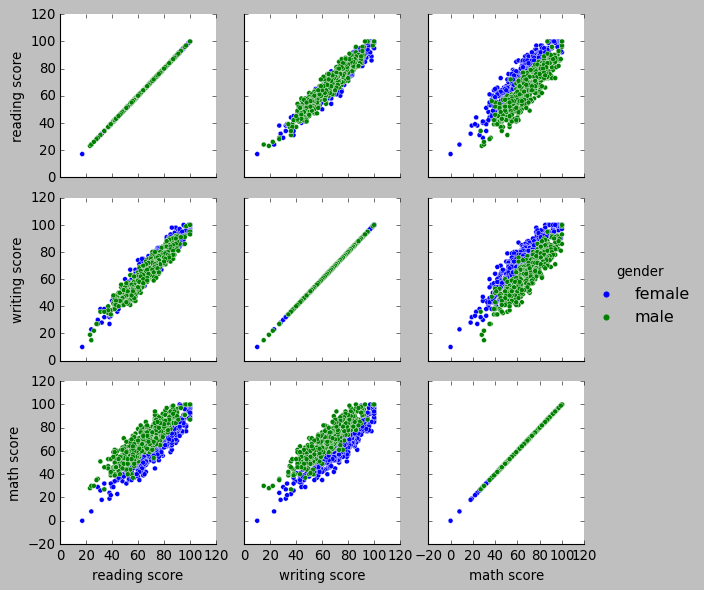

In [92]:
#Multiple RV analysis
data_sub = data[['reading score', 'writing score','math score', 'gender']]
g = sns.PairGrid(data_sub, hue='gender')
g.map(sns.scatterplot)
g.add_legend()

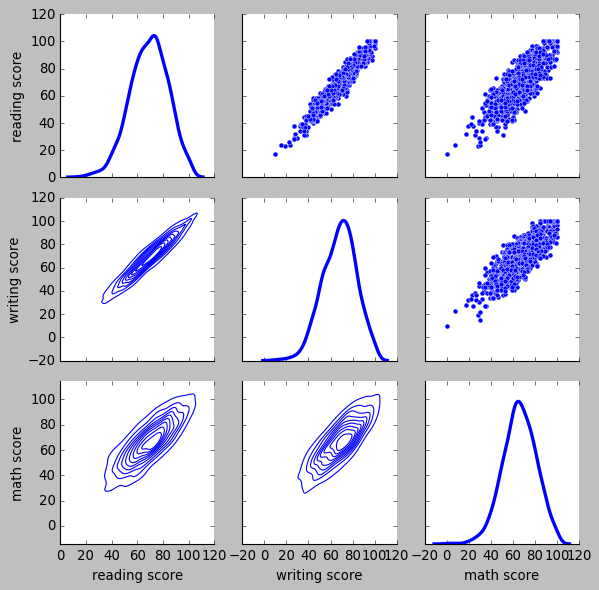

In [93]:
data_sub = data[['reading score', 'writing score','math score']]
g = sns.PairGrid(data_sub)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

<AxesSubplot:>

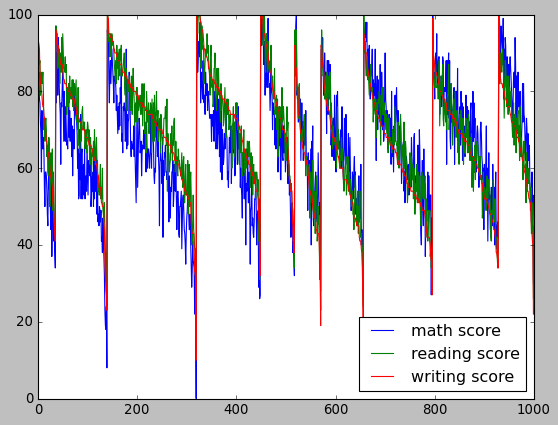

In [94]:
data[['math score', 'reading score', 'writing score']].plot()

## Table Query & Manipulation (SQL like)

**Number of Girl Students Scoring 90 in all the Subjects**

In [95]:
totaldata = data
femaledata = data[ (data['gender'] == 'female') ]
maledata = data[ (data['gender'] == 'male') ]

print(totaldata.shape, femaledata.shape, maledata.shape)

(1000, 8) (518, 8) (482, 8)


In [96]:
data[['gender','math score']]

,gender,math score
0,female,92
1,female,82
2,female,85
3,female,78
4,female,77
...,...,...
995,male,46
996,male,59
997,male,46
998,male,53


In [97]:
data[(data['gender'] == 'female') &
     (data['math score'] > 90) & 
     (data['writing score'] > 90) &
     (data['reading score'] > 90)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group A,some high school,standard,completed,92,100,97
36,female,group B,bachelor's degree,standard,none,97,97,96
140,female,group C,bachelor's degree,standard,completed,96,100,100
141,female,group C,bachelor's degree,standard,completed,92,100,99
142,female,group C,associate's degree,standard,completed,96,96,99
149,female,group C,associate's degree,standard,none,91,95,94
321,female,group D,some high school,standard,completed,97,100,100
324,female,group D,bachelor's degree,free/reduced,completed,93,100,100
325,female,group D,master's degree,standard,none,92,100,100
327,female,group D,some college,standard,none,98,100,99


**Lets compare the scores secured by Boys and Girls**

In [98]:
data.groupby(['gender']).agg(['min','median','max'])

math score             reading score             writing score         \
              min median  max           min median  max           min median   
gender                                                                         
female          0   65.0  100            17   73.0  100            10   74.0   
male           27   69.0  100            23   66.0  100            15   64.0   

             
        max  
gender       
female  100  
male    100

**Lets check the Effect of Lunch on Student's Performnce**

In [99]:
data[['lunch','gender','math score','writing score','reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

**Lets check the Effect of Test Preparation Course on Scores**

In [100]:
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

**Lets check the Effect of Race and Ethnicity on Student's Performance**

In [101]:
data[['race/ethnicity',
      'math score',
      'writing score',
      'reading score']].groupby(['race/ethnicity']).agg('median')

,math score,writing score,reading score
race/ethnicity,,,
group A,61.0,62.0,64.0
group B,63.0,67.0,67.0
group C,65.0,68.0,71.0
group D,69.0,72.0,71.0
group E,74.5,72.0,74.0


In [102]:
# setting a passing mark for the students to pass on the three subjects individually
passmarks = 40

# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_math'] = np.where(data['math score']< passmarks, 'Fail', 'Pass')
data[ ['gender', 'pass_math', 'math score'] ].groupby(['gender', 'pass_math']).agg('count')

math score
gender pass_math            
female Fail               31
       Pass              487
male   Fail                9
       Pass              473

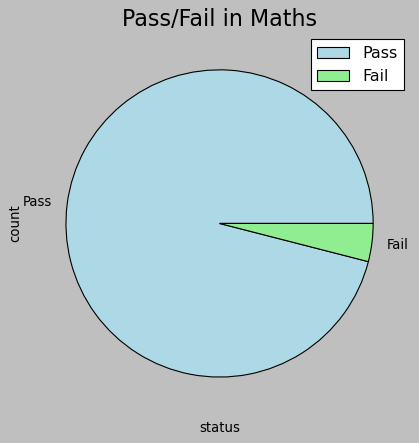

In [103]:
# feature engineering on the data to visualize and solve the dataset more accurately
data['pass_math'].value_counts().plot.pie(colors = ['lightblue', 'lightgreen'], legend=True)

plt.title('Pass/Fail in Maths', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

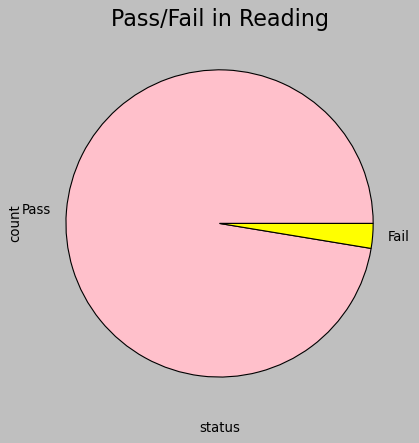

In [104]:
# creating a new column pass_reading, this column will tell us whether the students are pass or fail

data['pass_reading'] = np.where(data['reading score']< passmarks, 'Fail', 'Pass')
data['pass_reading'].value_counts(dropna = False).plot.pie(colors = ['pink', 'yellow'])

plt.title('Pass/Fail in Reading', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

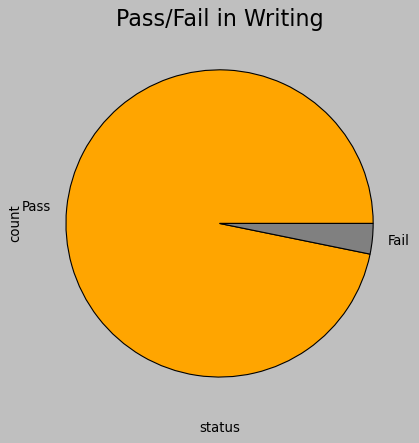

In [105]:
# creating a new column pass_writing, this column will tell us whether the students are pass or fail

data['pass_writing'] = np.where(data['writing score']< passmarks, 'Fail', 'Pass')
data['pass_writing'].value_counts(dropna = False).plot.pie(colors = ['orange', 'gray'])

plt.title('Pass/Fail in Writing', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

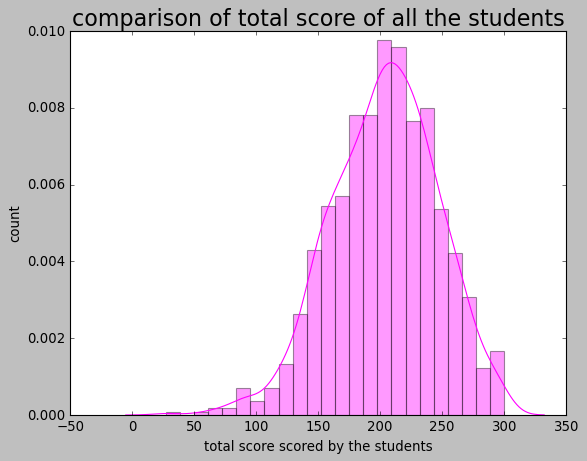

In [106]:
# computing the total score for each student

import warnings
warnings.filterwarnings('ignore')

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

sns.distplot(data['total_score'], color = 'magenta')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

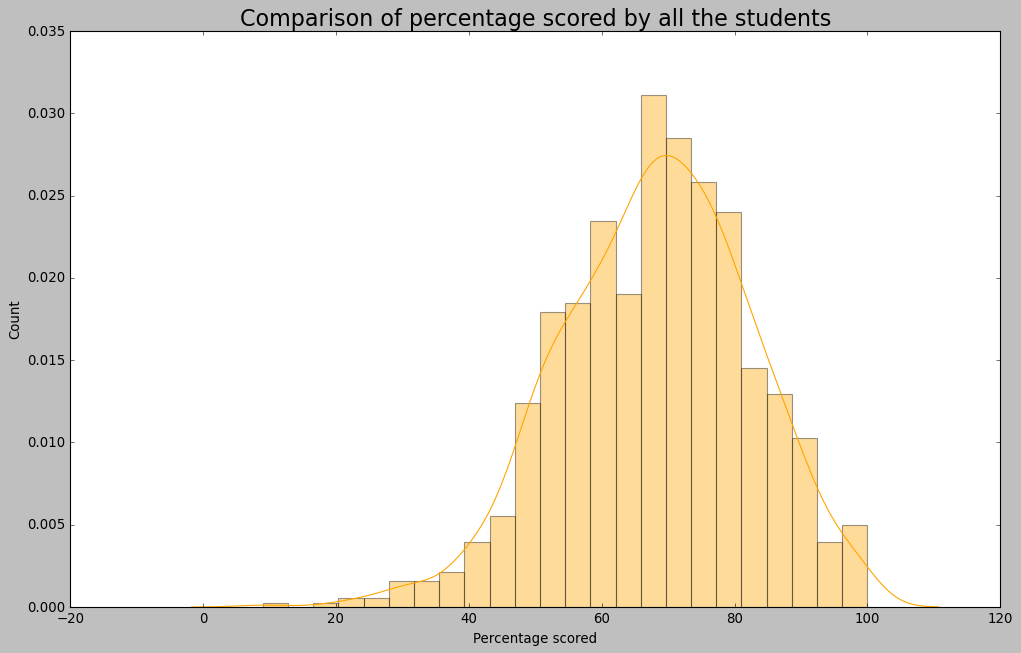

In [107]:

# computing percentage for each of the students
# importing math library to use ceil
from math import * 
import warnings
warnings.filterwarnings('ignore')

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(data['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

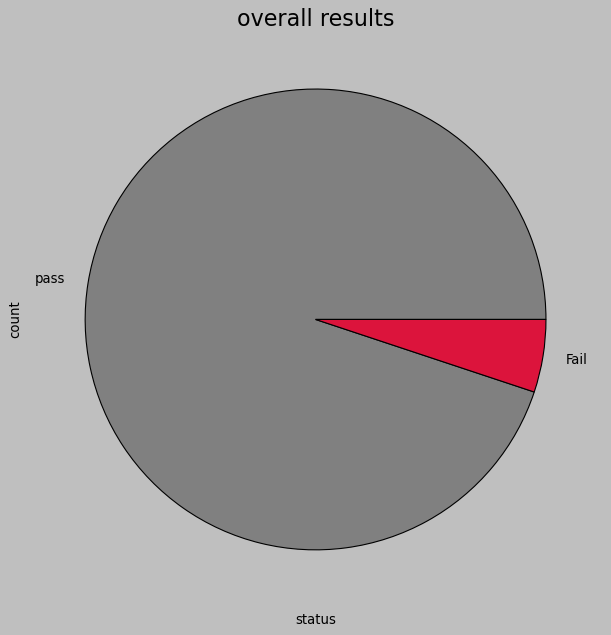

In [108]:
# checking which student is fail overall

data['status'] = data.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

data['status'].value_counts(dropna = False).plot.pie(colors = ['grey', 'crimson'])
plt.title('overall results', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [109]:
# Assigning grades to the grades according to the following criteria :
# 0  - 40 marks : grade E
# 41 - 60 marks : grade D
# 60 - 70 marks : grade C
# 70 - 80 marks : grade B
# 80 - 90 marks : grade A
# 90 - 100 marks : grade O

def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

data['grades'].value_counts()

B    260
C    252
D    223
A    156
O     58
E     51
Name: grades, dtype: int64

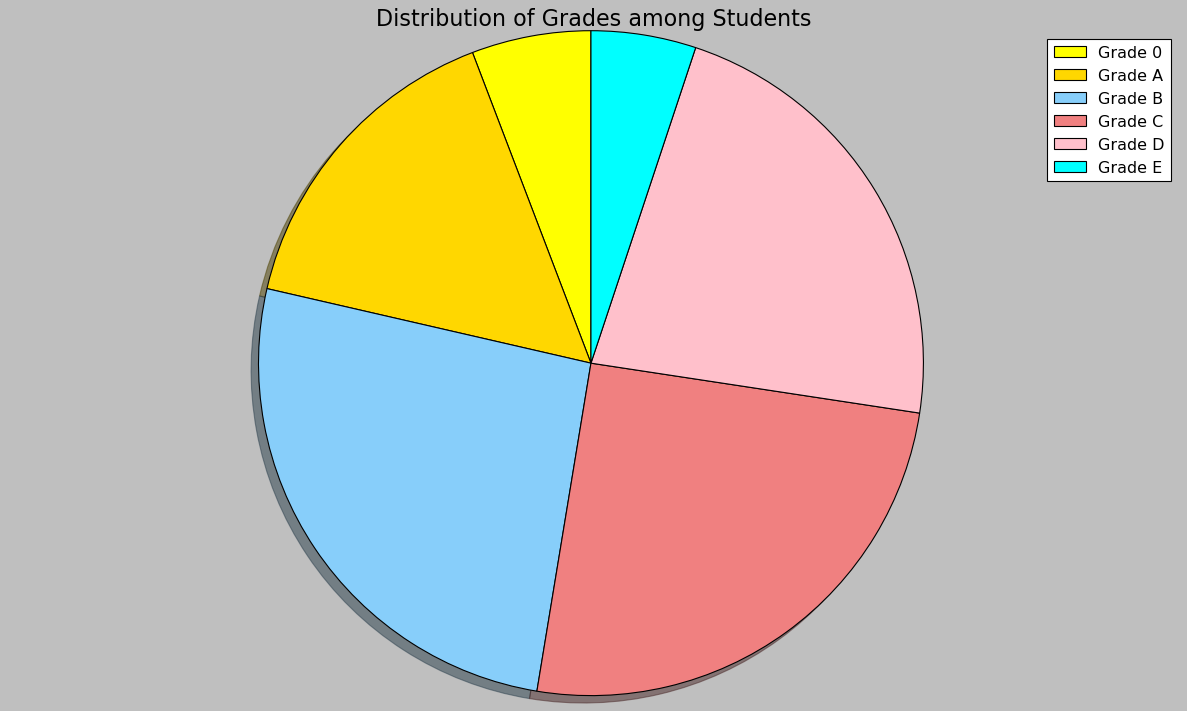

In [110]:
# plotting a pie chart for the distribution of various grades amongst the students

labels = ['Grade 0', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = [58, 156, 260, 252, 223, 51]
colors = ['yellow', 'gold', 'lightskyblue', 'lightcoral', 'pink', 'cyan']
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels)
plt.title('Distribution of Grades among Students', fontweight = 30, fontsize = 20)
plt.axis('equal')
plt.tight_layout()
plt.show()

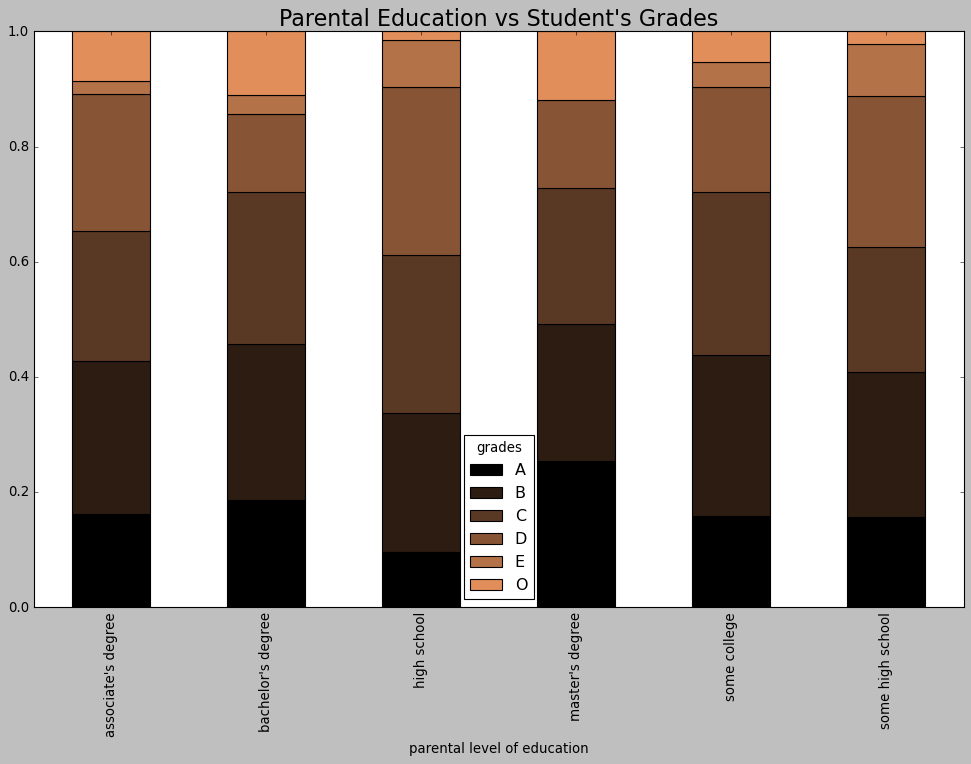

In [111]:
# comparison parent's degree and their corresponding grades

plt.rcParams['figure.figsize'] = (15, 9)

x = pd.crosstab(data['parental level of education'], data['grades'])
color = plt.cm.copper(np.linspace(0, 1, 8))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = color)
plt.title("Parental Education vs Student's Grades", fontweight = 30, fontsize = 20)
plt.show()

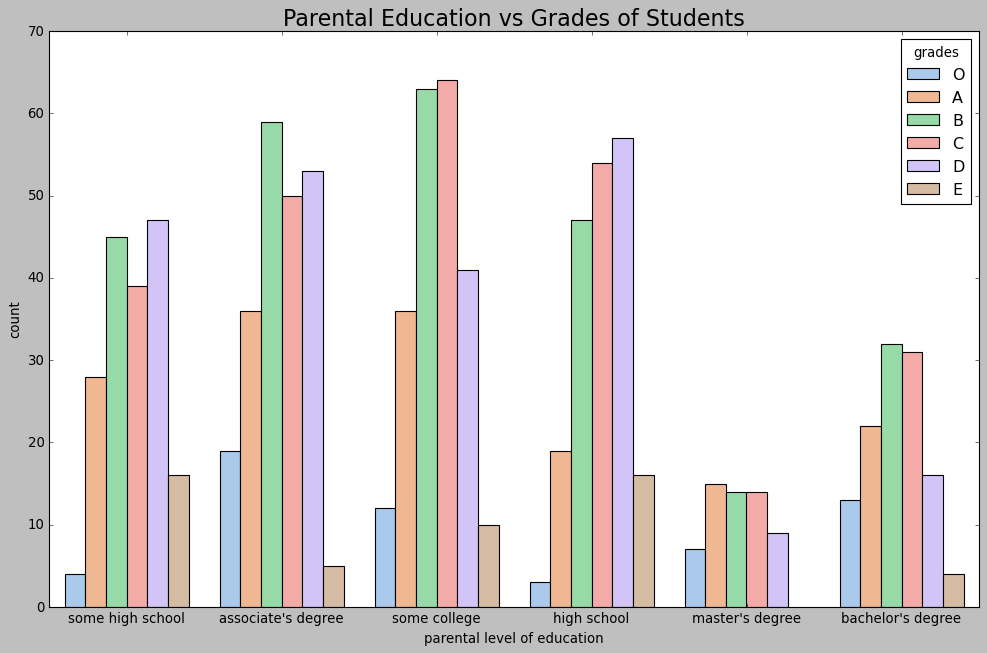

In [112]:
# for better visualization we will plot it again using seaborn

sns.countplot(x = data['parental level of education'], data = data, hue = data['grades'], palette = 'pastel')
plt.title('Parental Education vs Grades of Students', fontsize = 20, fontweight = 30)
plt.show()

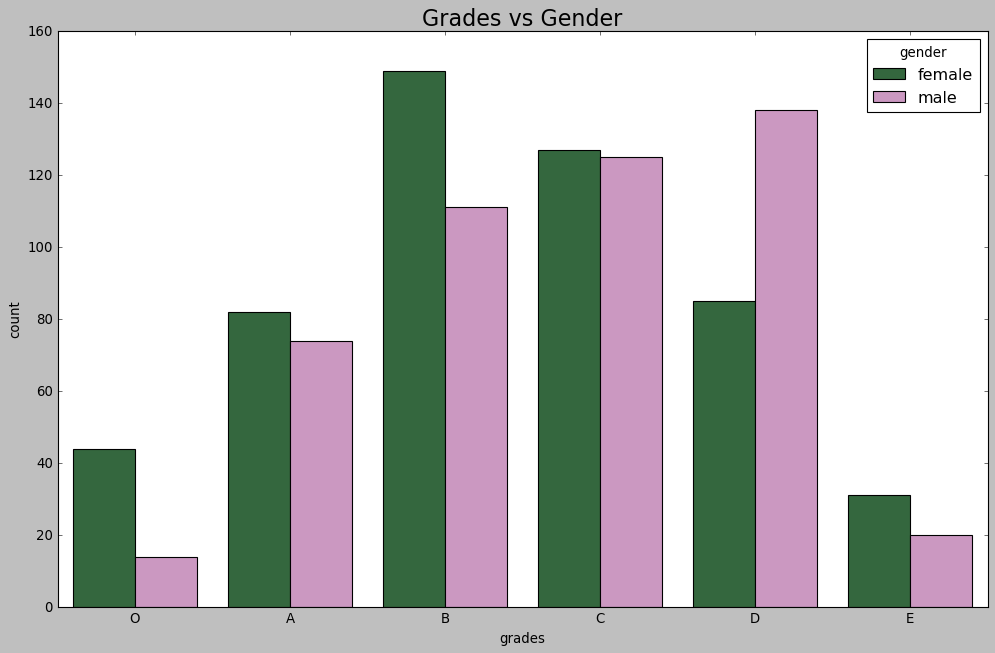

In [113]:
# comparing the distribution of grades among males and females

sns.countplot(x = data['grades'], data = data, hue = data['gender'], palette = 'cubehelix')
#sns.palplot(sns.dark_palette('purple'))
plt.title('Grades vs Gender', fontweight = 30, fontsize = 20)
plt.show()

In [114]:
print(data.columns)
data.pivot_table(values="race/ethnicity", index=["gender", "status"], 
                 columns="lunch", aggfunc="count", margins=True)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'pass_math', 'pass_reading', 'pass_writing',
       'total_score', 'percentage', 'status', 'grades'],
      dtype='object')


lunch          free/reduced  standard   All
gender status                              
female Fail              25         6    31
       pass             164       323   487
male   Fail              14         6    20
       pass             152       310   462
All                     355       645  1000

In [115]:
data.pivot_table(values="status", index=["gender", "grades"], 
                 columns="parental level of education", aggfunc="count", margins=True)

parental level of education  associate's degree  bachelor's degree  \
gender grades                                                        
female A                                   18.0               14.0   
       B                                   32.0               20.0   
       C                                   28.0               11.0   
       D                                   22.0                7.0   
       E                                    3.0                2.0   
       O                                   13.0                9.0   
male   A                                   18.0                8.0   
       B                                   27.0               12.0   
       C                                   22.0               20.0   
       D                                   31.0                9.0   
       E                                    2.0                2.0   
       O                                    6.0                4.0   
All                                       222.0              118.0   

parental level of education  high school  master's degree  some college  \
gender grades                                                             
female A                            10.0              7.0          20.0   
       B                            25.0              6.0          39.0   
       C                            29.0             10.0          33.0   
       D                            16.0              6.0          14.0   
       E                            11.0              NaN           4.0   
       O                             3.0              7.0           8.0   
male   A                             9.0              8.0          16.0   
       B                            22.0              8.0          24.0   
       C                            25.0              4.0          31.0   
       D                            41.0              3.0          27.0   
       E                             5.0              NaN           6.0   
       O                             NaN              NaN           4.0   
All                                196.0             59.0         226.0   

parental level of education  some high school   All  
gender grades                                        
female A                                 13.0    82  
       B                                 27.0   149  
       C                                 16.0   127  
       D                                 20.0    85  
       E                                 11.0    31  
       O                                  4.0    44  
male   A                                 15.0    74  
       B                                 18.0   111  
       C                                 23.0   125  
       D                                 27.0   138  
       E                                  5.0    20  
       O                                  NaN    14  
All                                     179.0  1000

## Data Preprocessing for Predictive Analytics

In [116]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])

# label encoding for lunch
data['lunch'] = le.fit_transform(data['lunch'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
data['parental level of education'] = le.fit_transform(data['parental level of education'])

#label encoding for gender
data['gender'] = le.fit_transform(data['gender'])

# label encoding for pass_math
data['pass_math'] = le.fit_transform(data['pass_math'])

# label encoding for pass_reading
data['pass_reading'] = le.fit_transform(data['pass_reading'])

# label encoding for pass_writing
data['pass_writing'] = le.fit_transform(data['pass_writing'])

# label encoding for status
data['status'] = le.fit_transform(data['status'])

# label encoding for grades
#data['grades'] = le.fit_transform(data['grades'])


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int32  
 1   race/ethnicity               1000 non-null   int64  
 2   parental level of education  1000 non-null   int32  
 3   lunch                        1000 non-null   int32  
 4   test preparation course      1000 non-null   int32  
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   pass_math                    1000 non-null   int32  
 9   pass_reading                 1000 non-null   int32  
 10  pass_writing                 1000 non-null   int32  
 11  total_score                  1000 non-null   int64  
 12  percentage                   1000 non-null   float64
 13  status             

In [118]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total_score,percentage,status,grades
0,0,1,5,1,0,92,100,97,1,1,1,289,97.0,1,O
1,0,1,0,1,1,82,93,93,1,1,1,268,90.0,1,O
2,0,1,5,1,0,85,90,92,1,1,1,267,89.0,1,A
3,0,1,4,1,0,78,87,91,1,1,1,256,86.0,1,A
4,0,1,2,0,0,77,88,85,1,1,1,250,84.0,1,A


## Data Preparation

In [119]:
# splitting the dependent and independent variables

x = data.iloc[:,:14]
y = data.iloc[:,14]

print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


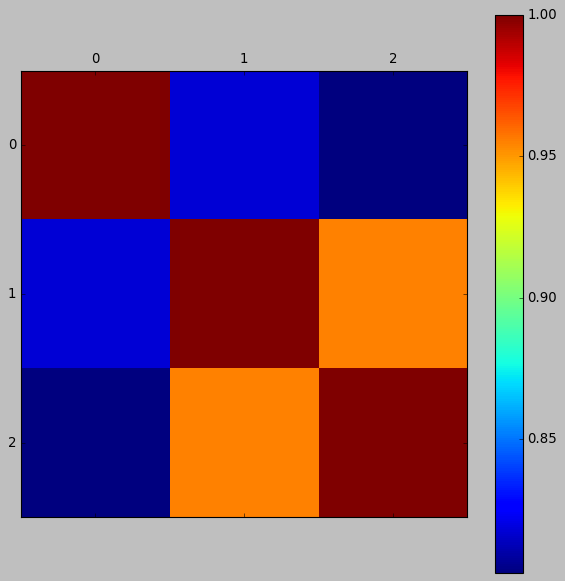

In [120]:
#Feature selection
plt.matshow(data[['math score', 'reading score', 'writing score']].corr())
plt.colorbar()
data[['math score', 'reading score', 'writing score']].corr()

In [121]:
data[['math score', 'reading score', 'writing score']].cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


In [122]:
# splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 14)
(750,)
(250, 14)
(250,)


In [123]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)


## Modelling Predictive Analytics - Supervised ML

## Logistic Regression

In [124]:
from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))


Training Accuracy : 0.848
Testing Accuracy : 0.844


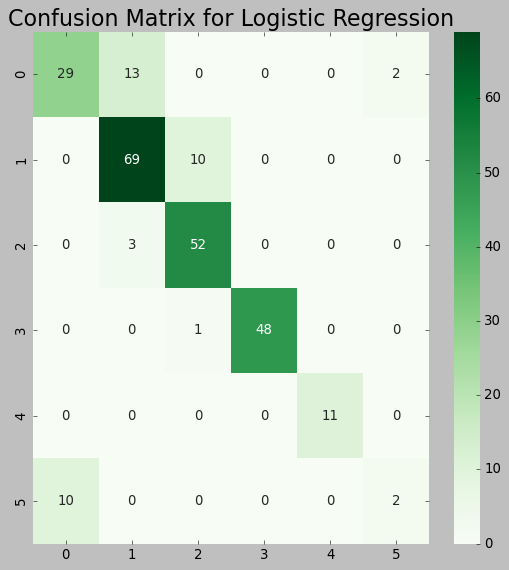

In [125]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Greens')
plt.title('Confusion Matrix for Logistic Regression', fontweight = 30, fontsize = 20)
plt.show()

**Random Forest**

In [126]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


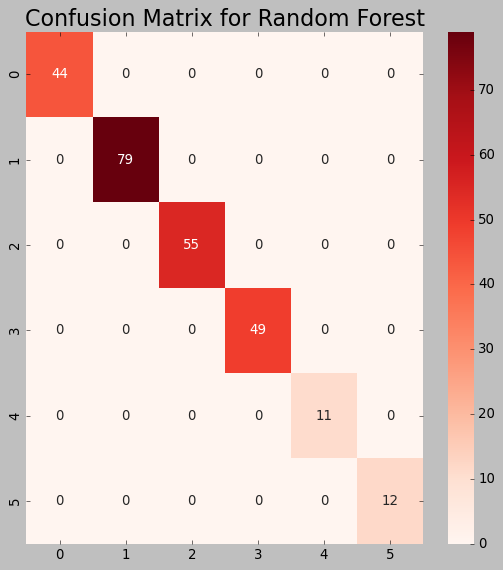

In [127]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()

In [128]:
from sklearn import svm

# creating a model
#model = svm.SVC()
#model = svm.SVC(decision_function_shape='ovo')
#model = svm.LinearSVC()
model = svm.SVC(decision_function_shape='ovo', class_weight='balanced', C=10000)

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.916


In [129]:
data['grades'].value_counts()

#B    260
#C    252
#D    223
#A    156
#O     58
#E     51

B    260
C    252
D    223
A    156
O     58
E     51
Name: grades, dtype: int64

In [130]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.888
Testing Accuracy : 0.896


# Predictive Analytics - Unsupervised ML

In [131]:
#Clustering - K-Means
from sklearn.cluster import KMeans

data_uv = data.iloc[:,1:14]
data_uv.head()
kmeans = KMeans(n_clusters=6, random_state=0).fit(data_uv)

print(kmeans.labels_)
print(kmeans.cluster_centers_)

[2 2 2 2 4 4 4 4 4 4 4 4 5 5 1 5 5 5 1 1 1 1 1 1 3 3 1 1 3 1 3 3 3 3 0 0 2
 2 2 2 2 2 2 2 4 4 4 4 2 2 2 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 5 4 5 4 4 4
 4 4 4 4 5 5 5 5 1 1 5 5 5 1 5 5 5 5 5 1 5 1 1 5 1 5 5 1 5 5 1 1 5 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 4 2 4 4 4 4 2 4 2 4 2 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4
 4 4 4 5 4 5 4 4 4 5 5 5 5 5 4 4 5 5 5 4 4 5 5 5 5 4 5 5 4 4 5 5 5 5 4 5 5
 5 5 5 5 5 5 4 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 1 5 1 5 5 5 5 5 5
 1 5 1 5 1 1 1 1 1 1 1 5 1 1 1 1 5 1 1 1 1 1 1 1 1 1 3 1 1 1 1 3 3 3 1 1 3
 3 3 3 3 3 3 1 3 3 3 3 3 3 3 0 0 3 3 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 4 2 4 2 2 2 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4
 4 5 4 5 5 5 4 4 5 5 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 4 4 5 5 5 5 5
 5 1 5 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 3 3 3 3 3 1 3 3 3 3 3
 3 0 3 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 2 4 4 4 4 4 4 4 5 4 5
 4 5 4 5 5 5 5 4 5 5 5 4 

In [132]:
clust_labels = kmeans.labels_
print(clust_labels.shape)

Clust_i_indices = np.where(clust_labels == 0)
print(Clust_i_indices[0].shape)
for index in Clust_i_indices[0]:
    print(index, data.iloc[index,14])

(1000,)
(38,)
34 E
35 E
135 E
136 E
137 E
138 E
139 E
310 E
311 E
314 E
315 E
316 E
317 E
318 E
319 E
445 E
447 E
448 E
515 D
516 E
517 E
568 E
569 E
570 E
652 E
653 E
654 E
655 E
656 E
793 E
794 E
795 E
924 E
925 E
926 E
927 E
928 E
999 E


In [133]:
#Clustering - DBscan
from sklearn.cluster import DBSCAN

data_uv = data.iloc[:,1:14]
data_uv.head()
clustering = DBSCAN(eps=3, min_samples=5).fit(data_uv)

clust_labels = clustering.labels_
print(clust_labels.shape)
print(np.unique(clust_labels))

Clust_i_indices = np.where(clust_labels == -1)
print(Clust_i_indices[0].shape)
for index in Clust_i_indices[0]:
    print(index, data.iloc[index,14])

(1000,)
[-1  0  1  2  3  4  5]
(965,)
0 O
1 O
2 A
3 A
4 A
5 B
6 B
7 B
8 B
9 B
10 B
11 B
12 B
13 C
14 C
15 C
16 C
17 C
18 C
19 C
20 D
21 C
22 C
23 C
24 D
25 D
26 D
27 C
28 E
29 D
30 D
31 D
32 D
33 D
34 E
35 E
36 O
37 O
38 O
39 O
40 A
41 O
42 O
43 A
44 A
45 A
46 B
47 A
48 A
49 A
50 O
51 A
52 B
53 A
54 A
55 A
56 A
57 A
58 B
59 B
60 B
61 B
62 A
63 B
64 A
65 B
66 B
67 B
68 B
69 B
70 B
71 B
73 B
74 A
75 B
76 B
77 B
78 B
79 B
80 C
81 B
82 C
83 C
84 C
85 C
86 B
87 C
88 B
89 B
90 C
91 C
92 C
93 C
94 B
95 C
96 C
97 C
98 C
99 C
100 C
101 C
103 C
104 C
105 C
107 C
108 D
109 C
110 C
111 C
112 C
113 C
114 C
115 C
116 D
117 C
118 C
119 D
120 C
121 D
122 D
123 D
124 D
125 D
126 D
127 D
128 D
129 D
130 E
131 D
132 D
133 E
134 E
135 E
136 E
137 E
138 E
139 E
140 O
142 O
143 O
144 A
145 O
146 O
147 A
148 O
149 O
150 O
151 O
152 O
153 A
154 A
155 A
156 A
157 A
158 A
159 A
160 A
161 A
162 A
163 A
164 A
165 A
166 A
167 A
168 A
169 B
170 A
171 B
172 A
173 A
174 A
175 A
176 B
177 A
178 A
179 B
180 B
181 B
182

In [134]:
data[ ['gender', 'grades'] ].groupby('grades').agg('count')

,gender
grades,
A,156
B,260
C,252
D,223
E,51
O,58


In [135]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'pass_math', 'pass_reading', 'pass_writing',
       'total_score', 'percentage', 'status', 'grades'],
      dtype='object')

In [136]:
data.pivot_table(values="status", index=["gender", "test preparation course"], columns="lunch", aggfunc="count", margins=True)

lunch                             0    1   All
gender test preparation course                
0      0                         70  114   184
       1                        119  215   334
1      0                         61  113   174
       1                        105  203   308
All                             355  645  1000